# Visión por Computadora I - Trabajo Práctico 3

In [1]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline

# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## Encontrar el logotipo de la gaseosa dentro de las imágenes


Definimos el template a utilizar

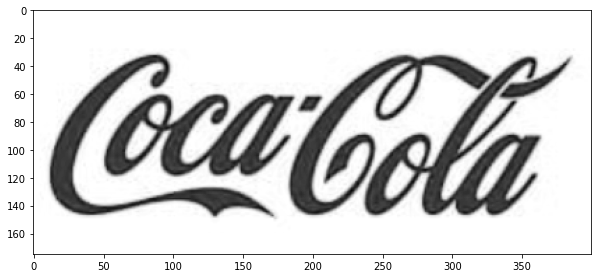

In [31]:
# Cargamos el template
template = cv.imread('/content/drive/MyDrive/Colab Notebooks/Dataset/template/pattern.png', cv.IMREAD_GRAYSCALE)

plt.figure(figsize=(10, 5))
plt.imshow(template, cmap='gray')


Cargamos las imágenes que se usarán para la detección

In [32]:
# Definimos la ruta de las imágenes
ruta = '/content/drive/MyDrive/Colab Notebooks/Dataset/images/'

# Cargamos las imágenes
COCA_COLA_LOGO = cv.imread(ruta+'COCA-COLA-LOGO.jpg')
coca_logo_1 = cv.imread(ruta+'coca_logo_1.png')
coca_logo_2 = cv.imread(ruta+'coca_logo_2.png')
coca_multi = cv.imread(ruta+'coca_multi.png')
coca_retro_1 = cv.imread(ruta+'coca_retro_1.png')
coca_retro_2 = cv.imread(ruta+'coca_retro_2.png')
logo_1 = cv.imread(ruta+'logo_1.png')

# Creamos una lista con todas las imágenes
imagenes = [COCA_COLA_LOGO, coca_logo_1, coca_logo_2, coca_multi, coca_retro_1, coca_retro_2, logo_1]


### 1. Detección del logo en cada imagen

Implementamos la función de detección

In [102]:
def deteccion_logo(I,T):
  '''
  Argumentos
  I: imagen de entrada
  T: template
  ---------------------------------------
  Retorno
  MAX_VAL: máximo valor de match
  rec_coords: coordenadas del rectángulo
  '''

  img = cv.cvtColor(I, cv.COLOR_BGR2GRAY)
  # Se detectan los bordes en el template aplicando Canny
  bordes_template = cv.Canny(T, 300, 350, apertureSize=3)
  template_h, template_w = bordes_template.shape

  # Filtramos la imagen y detectamos bordes
  imagen = cv.medianBlur(img, 7)
  bordes_imagen = cv.Canny(imagen, 150, 200,L2gradient=True)
  ret, bordes_imagen = cv.threshold(bordes_imagen,180,255,cv.THRESH_BINARY)
  imagen_h, imagen_w = bordes_imagen.shape

  meth = 'cv.TM_CCORR_NORMED'
  method = eval(meth)

  max_h = imagen_h / template_h
  max_w = imagen_w / template_w

  if (max_h < max_w):
    scales = np.linspace(max_h, max_h*0.1, 20)
  else:
    scales = np.linspace(max_w, max_w*0.1, 20)

  resized_templates = list()

  for scale in scales:
    resized_templates.append(cv.resize(bordes_template, None, fx = scale, fy = scale))

  MAX_VAL = 0

  for template_r in resized_templates:
    h_r, w_r = template_r.shape

    # Aplicamos la coincidencia de patrones
    #--------------------------------------
    res = cv.matchTemplate(bordes_imagen, template_r, method)
  
    # Encontramos los valores máximos y mínimos
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
      
    top_left = max_loc

    # Actualizamos el max_val
    if max_val > MAX_VAL:
      MAX_VAL = max_val
      bottom_right = (top_left[0] + w_r, top_left[1] + h_r)
      rec_coords = [top_left, bottom_right]    
    else:
      diff = ((MAX_VAL-max_val)/MAX_VAL)*100
      if diff > 8:
        break


  return MAX_VAL, rec_coords 
  
      

Evaluamos la función en todas las imágenes

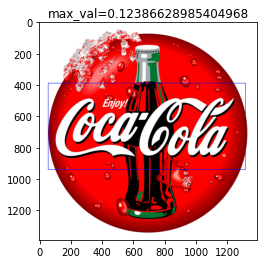

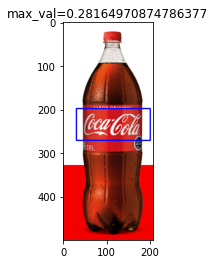

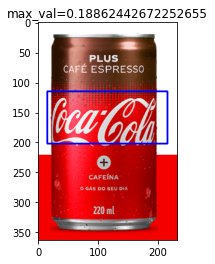

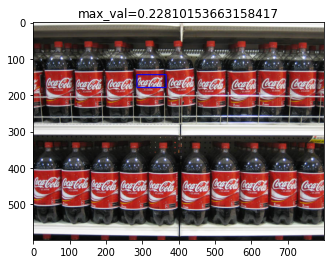

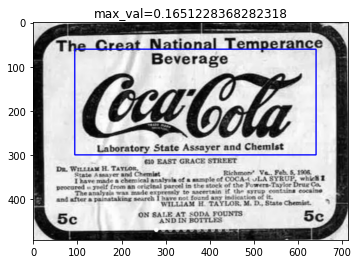

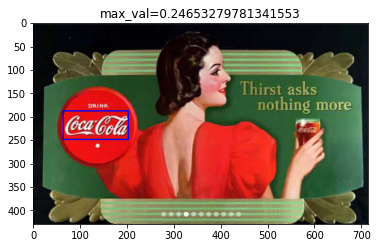

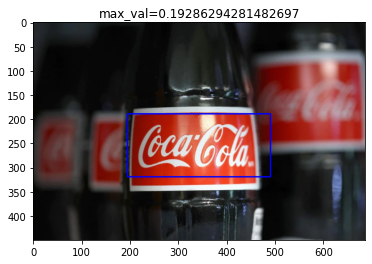

In [103]:
for imagen in imagenes:
  max_val, coordenadas = deteccion_logo(imagen, template)
  img_salida = imagen.copy()
  img_salida = cv.cvtColor(img_salida, cv.COLOR_BGR2RGB)
  # Dibujamos el rectángulo donde se encontró el logo
  cv.rectangle(img_salida, coordenadas[0], coordenadas[1], (0,0,255), 2)

  #Imagen original con el logo detectado
  plt.figure()
  plt.subplot(111)
  plt.imshow(img_salida)
  plt.title('max_val='+str(max_val))
  plt.show()



### 2. Múltiples detecciones de logos

In [171]:
def deteccion_logos(I,T):
  '''
  Argumentos
  I: imagen de entrada
  T: template
  ---------------------------------------
  Retorno
  MAX_VAL: máximo valor de match
  rec_coords: coordenadas del rectángulo
  '''

  img = cv.cvtColor(I, cv.COLOR_BGR2GRAY)

  # Se detectan los bordes en el template aplicando Canny
  bordes_template = cv.Canny(T, 300, 350, apertureSize=3)
  template_h, template_w = bordes_template.shape

  # Filtramos la imagen y detectamos bordes
  imagen = cv.medianBlur(img, 7)
  bordes_imagen = cv.Canny(imagen, 150, 200,L2gradient=True)
  ret, bordes_imagen = cv.threshold(bordes_imagen,180,255,cv.THRESH_BINARY)
  imagen_h, imagen_w = bordes_imagen.shape

  meth = 'cv.TM_CCORR_NORMED'
  method = eval(meth)

  max_h = imagen_h / template_h
  max_w = imagen_w / template_w

  if (max_h < max_w):
    scales = np.linspace(max_h, max_h*0.1, 20)
  else:
    scales = np.linspace(max_w, max_w*0.1, 20)

  resized_templates = list()

  for scale in scales:
    resized_templates.append(cv.resize(bordes_template, None, fx = scale, fy = scale))

  MAX_VAL = 0

  for template_r in resized_templates:
    h_r, w_r = template_r.shape

    res = cv.matchTemplate(bordes_imagen,template_r,method)
    
    # Encontramos los valores máximos y mínimos
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
      
    top_left = max_loc

    # Actualizamos el max_val
    if max_val > MAX_VAL:
      MAX_VAL = max_val
      TEMPLATE = template_r
    else:
      diff = ((MAX_VAL-max_val)/MAX_VAL)*100
      if diff > 8:
        break
  
  res = cv.matchTemplate(bordes_imagen,TEMPLATE,method)
  # Fijamos un umbral de "coincidencia"
  threshold = 0.2
  rec_coords = list()

  loc = np.where( res >= threshold)
  for pt in zip(*loc[::-1]):
      rec_coords.append([pt, (pt[0] + w_r, pt[1] + h_r)])

  return rec_coords 
  
      

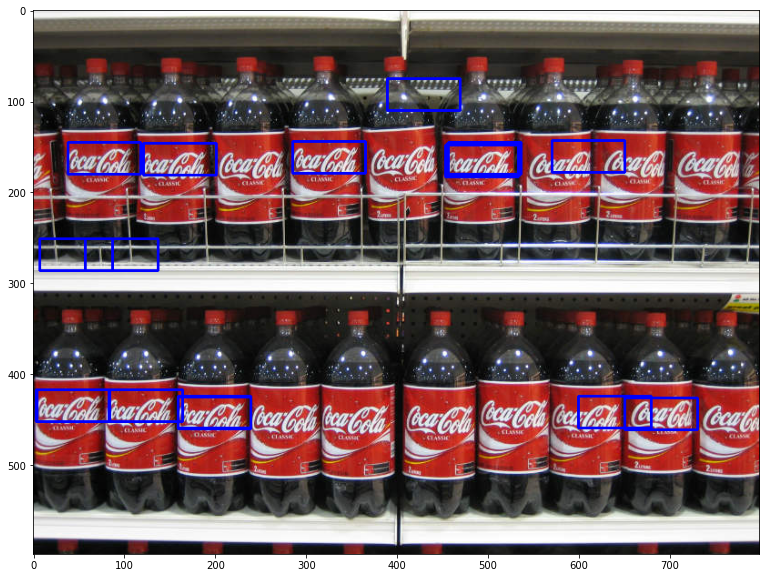

In [172]:
coordenadas = deteccion_logos(coca_multi, template)
img_salida = coca_multi.copy()
img_salida = cv.cvtColor(img_salida, cv.COLOR_BGR2RGB)
# Dibujamos los rectángulos donde se encontró logos
for coordenada in coordenadas:
  cv.rectangle(img_salida, coordenada[0], coordenada[1], (0,0,255), 2)
  
#Imagen original con los logos detectados
plt.figure(figsize=(15,10))
plt.subplot(111)
plt.imshow(img_salida)
plt.show()